# <span style="color:#3a0ca3; font-weight:700; font-family:'Segoe UI', Arial, sans-serif; border-bottom:2px solid #7209b7; padding-bottom:5px; display:inline-block">Hierarchical Clustering Analysis Using Dendrograms</span>

<div style="background:linear-gradient(135deg, #f8f9ff 0%, #e9ecef 100%); padding:22px; border-radius:10px; border-left:6px solid #4361ee; margin-bottom:28px; box-shadow:0 3px 10px rgba(0,0,0,0.08)">
<h2 style="color:#3a0ca3; font-weight:600; margin-top:0">📊 Methodological Overview</h2>
<p style="color:#4a4e69; line-height:1.7">This analysis demonstrates hierarchical clustering with:</p>
<ul style="color:#4a4e69; list-style-type:none; padding-left:0">
  <li style="margin-bottom:10px; padding-left:28px; position:relative">🔷 <span style="position:absolute; left:0; color:#4895ef">▪</span> <strong style="color:#3f37c9">Euclidean metric</strong>: Measures pairwise distances</li>
  <li style="margin-bottom:10px; padding-left:28px; position:relative">🔷 <span style="position:absolute; left:0; color:#4895ef">▪</span> <strong style="color:#3f37c9">Ward linkage</strong>: Optimizes cluster merging</li>
  <li style="padding-left:28px; position:relative">🔷 <span style="position:absolute; left:0; color:#4895ef">▪</span> <strong style="color:#3f37c9">Dendrograms</strong>: Visualize cluster hierarchies</li>
</ul>
</div>

## <span style="color:#7209b7; font-weight:600; display:inline-block; background:linear-gradient(90deg, #f72585 0%, #7209b7 100%); -webkit-background-clip:text; -webkit-text-fill-color:transparent; padding-bottom:5px">Dendrogram Interpretation Guide</span>

<div style="display:grid; grid-template-columns:1fr 1fr; gap:24px; margin:30px 0">
  <div style="background:linear-gradient(145deg, #f0f9ff 0%, #caf0f8 100%); padding:22px; border-radius:10px; box-shadow:0 4px 8px rgba(72,149,239,0.1); border-top:3px solid #4895ef">
  <h3 style="color:#4361ee; margin-top:0; font-weight:600">✂️ Step 1: Horizontal Cut</h3>
  <ol style="color:#4a4e69; padding-left:24px">
    <li style="margin-bottom:12px">Draw line at desired similarity threshold</li>
    <li>Count intersected branches → cluster count</li>
  </ol>
  </div>
  
  <div style="background:linear-gradient(145deg, #fff0f3 0%, #ffccd5 100%); padding:22px; border-radius:10px; box-shadow:0 4px 8px rgba(239,71,111,0.1); border-top:3px solid #ef476f">
  <h3 style="color:#f72585; margin-top:0; font-weight:600">📏 Step 2: Distance Analysis</h3>
  <ul style="color:#4a4e69; padding-left:24px">
    <li style="margin-bottom:12px"><span style="color:#7209b7; font-weight:600">Long vertical lines</span> = Strong cluster separation</li>
    <li><span style="color:#7209b7; font-weight:600">Natural gaps</span> = Optimal split points</li>
  </ul>
  </div>
</div>

<div style="overflow-x:auto; margin:35px 0">
<table style="width:100%; border-collapse:separate; border-spacing:0; background:white; border-radius:12px; box-shadow:0 4px 12px rgba(0,0,0,0.08); overflow:hidden">
  <thead>
    <tr style="background:linear-gradient(90deg, #3a0ca3 0%, #4361ee 100%)">
      <th style="padding:16px; text-align:left; color:white; font-weight:500"><span style="opacity:0.9">Feature</span></th>
      <th style="padding:16px; text-align:left; color:white; font-weight:500"><span style="opacity:0.9">Analytical Value</span></th>
    </tr>
  </thead>
  <tbody>
    <tr style="border-bottom:1px solid #f8f9fa">
      <td style="padding:14px 16px; color:#2b2d42"><strong>Visual Hierarchy</strong></td>
      <td style="padding:14px 16px; color:#4a4e69">Reveals nested cluster relationships</td>
    </tr>
    <tr style="border-bottom:1px solid #f8f9fa">
      <td style="padding:14px 16px; color:#2b2d42"><strong>Linkage Metrics</strong></td>
      <td style="padding:14px 16px; color:#4a4e69">Quantifies cluster similarities</td>
    </tr>
    <tr>
      <td style="padding:14px 16px; color:#2b2d42"><strong>Optimal Splitting</strong></td>
      <td style="padding:14px 16px; color:#4a4e69">Identifies natural cluster boundaries</td>
    </tr>
  </tbody>
</table>
</div>

<div style="background:linear-gradient(90deg, #fff8f0 0%, #ffeedd 100%); padding:20px; border-left:6px solid #ff9e00; border-radius:0 12px 12px 0; margin-top:35px; box-shadow:0 3px 10px rgba(255,158,0,0.1)">
<p style="color:#ff7b00; font-weight:600; margin:0 0 10px 0; font-size:1.1em">💡 Expert Insight</p>
<p style="color:#6c757d; margin:0; line-height:1.7">The Ward method minimizes variance during merging, producing compact clusters. <span style="color:#ff7b00">Pro Tip:</span> For datasets with >10k observations, consider <span style="font-weight:500">agglomerative clustering</span> with <span style="font-weight:500">connectivity constraints</span> to improve scalability.</p>
</div>

In [29]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
#load the datset
df = pd.read_csv('Mall_Customers.csv')

In [31]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
#choose only two columns for clustering
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]

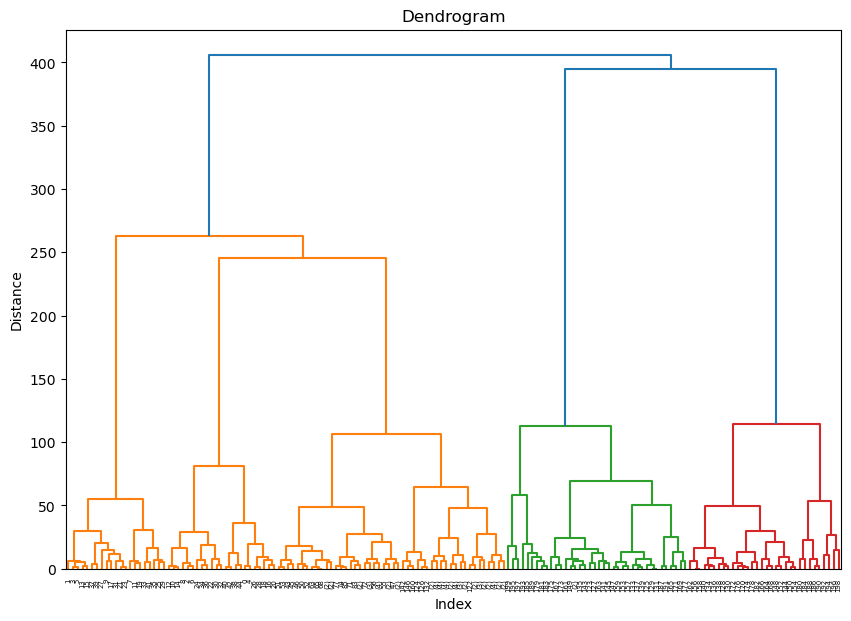

In [33]:
# using dendrogram to find the number of clusters with euclidean distance
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

Z = linkage(df[['Annual Income (k$)', 'Spending Score (1-100)']], method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.xticks([])
dendrogram(Z, truncate_mode='level', p=8)
plt.show()

<div style="background: linear-gradient(135deg, #fff5f5 0%, #fff9f9 100%); 
            padding: 18px; 
            border-radius: 8px; 
            border-left: 4px solid #ff4757;
            margin: 20px 0;
            box-shadow: 0 3px 6px rgba(255, 71, 87, 0.12)">
            
<h3 style="color: #ff4757; margin-top: 0; font-weight: 600; display: flex; align-items: center;">
    <span style="margin-right: 10px;">✂️</span> Optimal Cluster Determination
</h3>

<p style="color: #57606f; margin-bottom: 0; line-height: 1.6;">
    <span style="background: #ffecee; padding: 2px 6px; border-radius: 4px; font-weight: 500;">Key Action:</span> 
    Cut the dendrogram <strong>at the height</strong> where you observe:
</p>

<ul style="color: #57606f; padding-left: 24px;">
    <li style="margin-bottom: 8px; position: relative;">
        <span style="position: absolute; left: -18px; color: #ff4757;">▸</span>
        The <strong style="color: #3742fa;">largest vertical distances</strong> between merges
    </li>
    <li style="position: relative;">
        <span style="position: absolute; left: -18px; color: #ff4757;">▸</span>
        Significant <strong style="color: #3742fa;">gaps in merge heights</strong>
    </li>
</ul>

<div style="background: #f1f2f6; padding: 12px; border-radius: 6px; margin-top: 12px;">
    <p style="color: #2f3542; margin: 0; font-style: italic; font-size: 0.95em;">
        💡 <strong>Why this works:</strong> Long vertical lines indicate substantial dissimilarity between merging clusters, suggesting natural divisions in your data.
    </p>
</div>

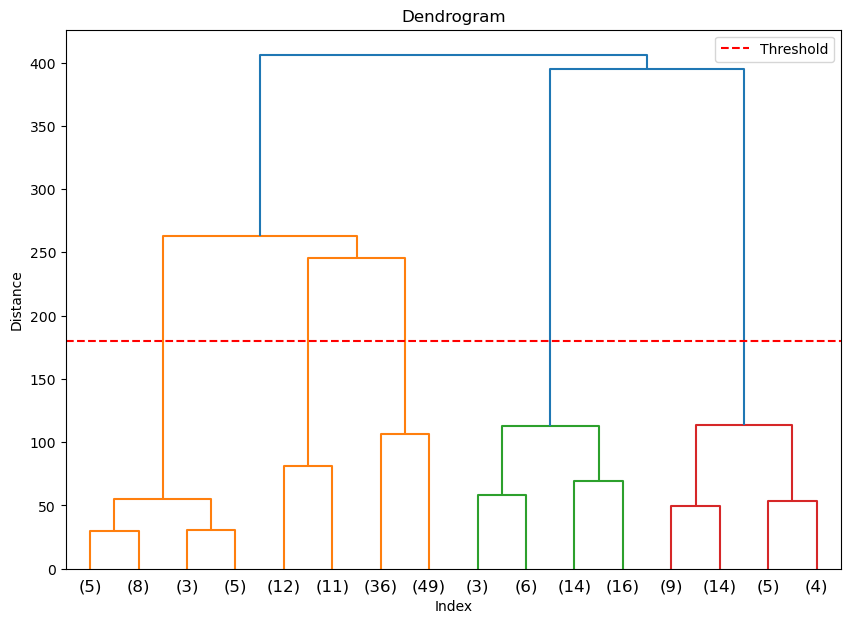

In [34]:
y1 = 180  # Set the threshold value for the horizontal cut (adjust as needed)
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.xticks([])
dendrogram(Z, truncate_mode='level', p=3)
plt.axhline(y=y1, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.show()


In [35]:
clusters = fcluster(Z, 5, criterion='maxclust')
df['cluster'] = clusters


In [36]:
#displaying the first few rows of the dataframe with cluster labels
print(df.head())

   Annual Income (k$)  Spending Score (1-100)  cluster
0                  15                      39        2
1                  15                      81        1
2                  16                       6        2
3                  16                      77        1
4                  17                      40        2


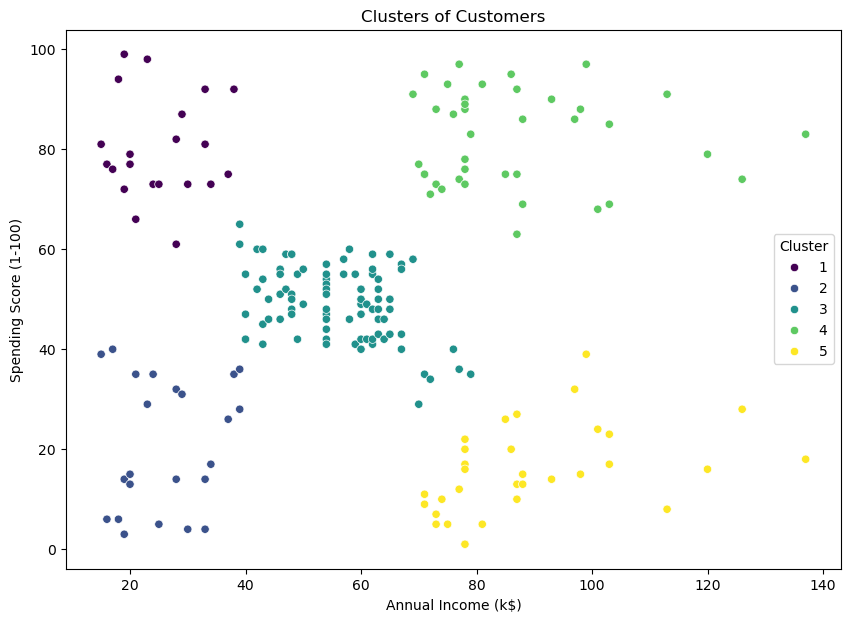

In [37]:

#visualizing the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', data=df, palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


#
<div style="background: linear-gradient(135deg, #ff7e5f, #feb47b); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;">This plot indicates that using 5 clusters is optimal </h2>
</div>

In [38]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for the clustering
score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], df['cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.553
